# **RNSA Breast Cancer Detector.**

## EDA:

**Informacion del Dataset**

- `site_id` -> Identificador del centro donde se hizo la mamografia.

- `patient_id`-> Identificador del paciente.

- `image_id` -> Identificador de la mamografia.

- `laterality`-> Seno del cual se hizo la mamografia.

- `view`-> Plano con el cual se hizo la mamografia. Hay 6 planos posibles pero solo tenemos muestras de los 2 siguientes:
    - CC: Crano-Caudal.
    - MLO: Medio Lateral Oblicuo.

- `age`-> Edad de la paciente.

- `CANCER` -> El Target del dataset.

- `biopsy`-> Informa sobre si la paciente se ha sometido o no a una biopsia.

- `invasive` -> Informa sobre si el cancer se ha expandido a tejido sano dentro del seno.

- `BI-RADS`: (Sistema de Informe y Registro de Imágenes Mamarias) Escala de 0-6 para determinar la posibilidad de cancer maligno con los resultados de la mamografia.
    - 0 : No concluyente.
    - 1 : Mama normal.
    - 2 : Hallazgos benignos.
    - 3 : Hallazgos posiblemente benignos.
    - 4 : Anormalidad sospechosa.
    - 5 : Hallazgos posiblemente malignos.
    - 6 : Lesión maligna demostrada.

- `implant` -> Informa si la paciente tiene un implante en el seno.

- `density` -> Densidad del tejido mamario. Se cataloga en 4 rangos:
    - A : Mayormente Grasa.
    - B : Areas fibroglandular dispersas
    - C : Mama hetereogeneamente densa.
    - D : Mama extremadamente densa.

- `machine_id` -> Identificador del equipo que realizo la mamografia.

- `difficult_negative_case` -> Mamografias que han sido etiquetadas como dificil de interpretar.

**Librerias**

In [5]:
# Librerias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer


## Carga de datos

In [7]:
#Vamos a crear un bloque de comprobación para asegurar que los datos se cargan sin problema.

def GetData():
    print("Loading data...\n==========\n")
    try:
        data_train = pd.read_csv("../data/raw/train.csv")
        print("· Train data loaded")
        return data_train
    except Exception as e:
        print(f"· Train data is not loaded: Exception {e}\n==========\n")
        return None

dataTrain = GetData()

Loading data...

· Train data loaded


## Analisis y Procesamiento de Datos

**Detección de los datos NaN**

In [15]:
def DataAnalysis(dataset):
    #Mostramos las dimensiones del dataset y la descripción
    print(f"Data Dimensions: {dataset.shape}\n")
    print(f"Data Description:\n==========\n{dataset.describe(include="all")}\n==========\n")

    #Creamos un filtro para obtener las columnas con valores no numericos.    
    nan_filter = dataset.isna().sum()
    data_nan = nan_filter[nan_filter > 0]

    if data_nan.empty:
        print("Non Nan Values\n")
    
    else:
        print("Nan Values:\n==========\n")
        for col, n in data_nan.items():
            print(f"· Column {col}: {n} NaN values")


DataAnalysis(dataTrain)

Data Dimensions: (54706, 14)

Data Description:
             site_id    patient_id      image_id laterality   view  \
count   54706.000000  54706.000000  5.470600e+04      54706  54706   
unique           NaN           NaN           NaN          2      6   
top              NaN           NaN           NaN          R    MLO   
freq             NaN           NaN           NaN      27439  27903   
mean        1.460407  32698.865262  1.079386e+09        NaN    NaN   
std         0.498434  18893.861534  6.183269e+08        NaN    NaN   
min         1.000000      5.000000  6.849100e+04        NaN    NaN   
25%         1.000000  16481.000000  5.458153e+08        NaN    NaN   
50%         1.000000  32432.000000  1.082689e+09        NaN    NaN   
75%         2.000000  48999.000000  1.613228e+09        NaN    NaN   
max         2.000000  65534.000000  2.147472e+09        NaN    NaN   

                 age        cancer        biopsy      invasive        BIRADS  \
count   54669.000000  54706.000

**Graficos Univariables**

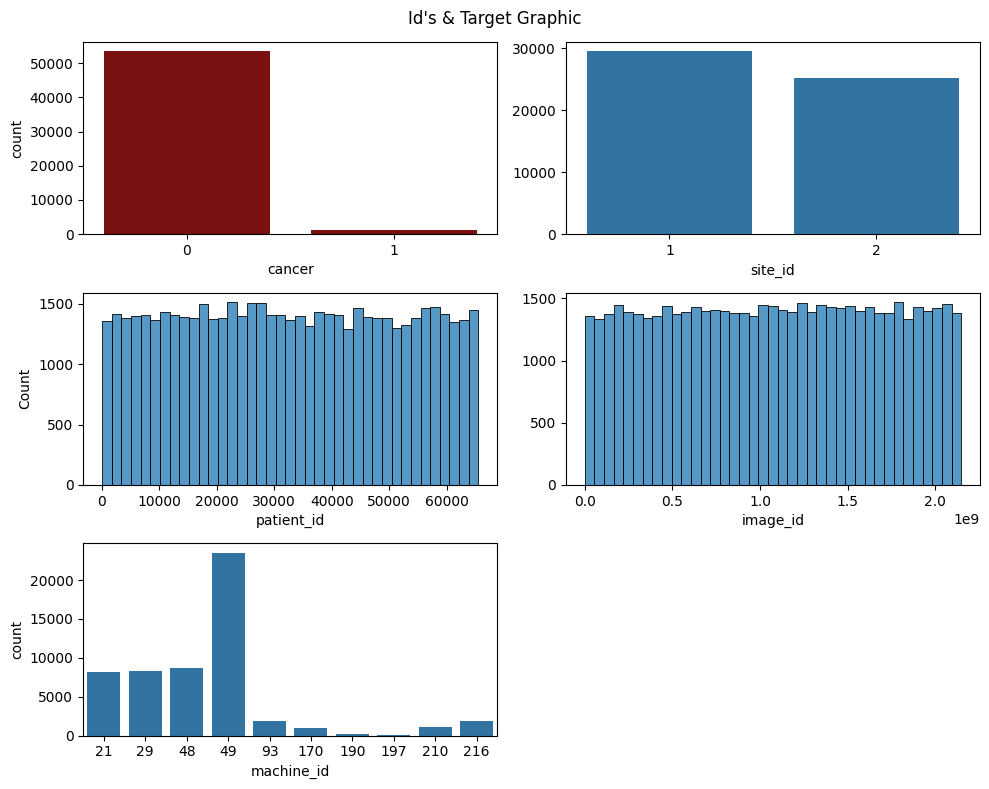

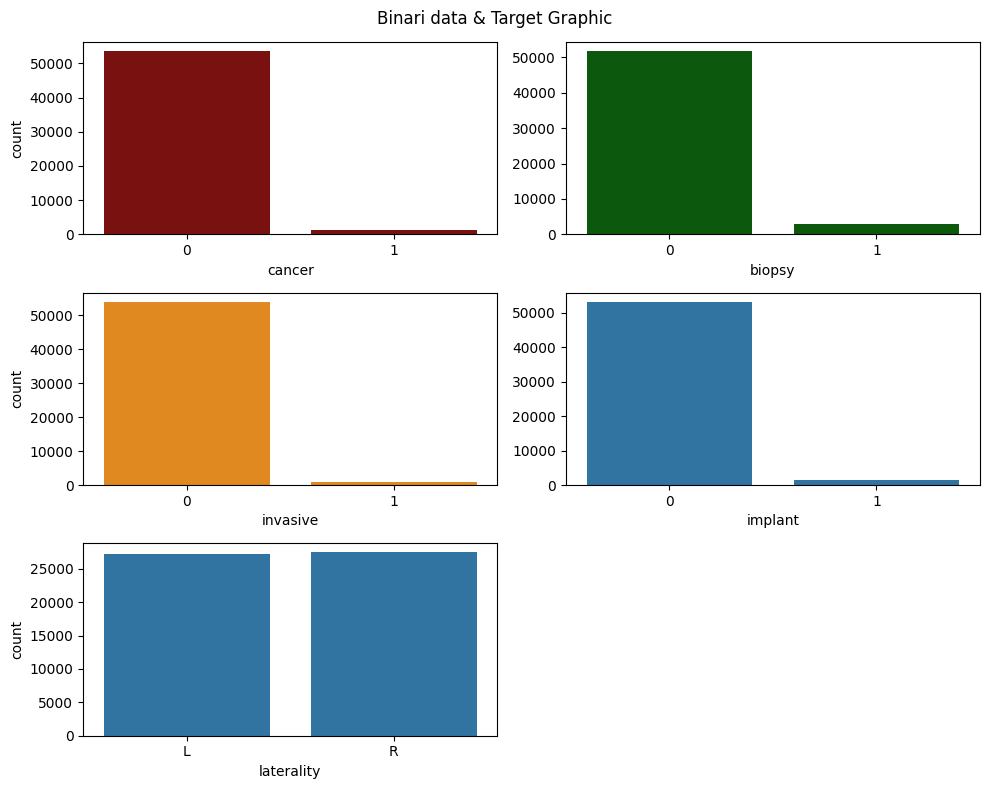

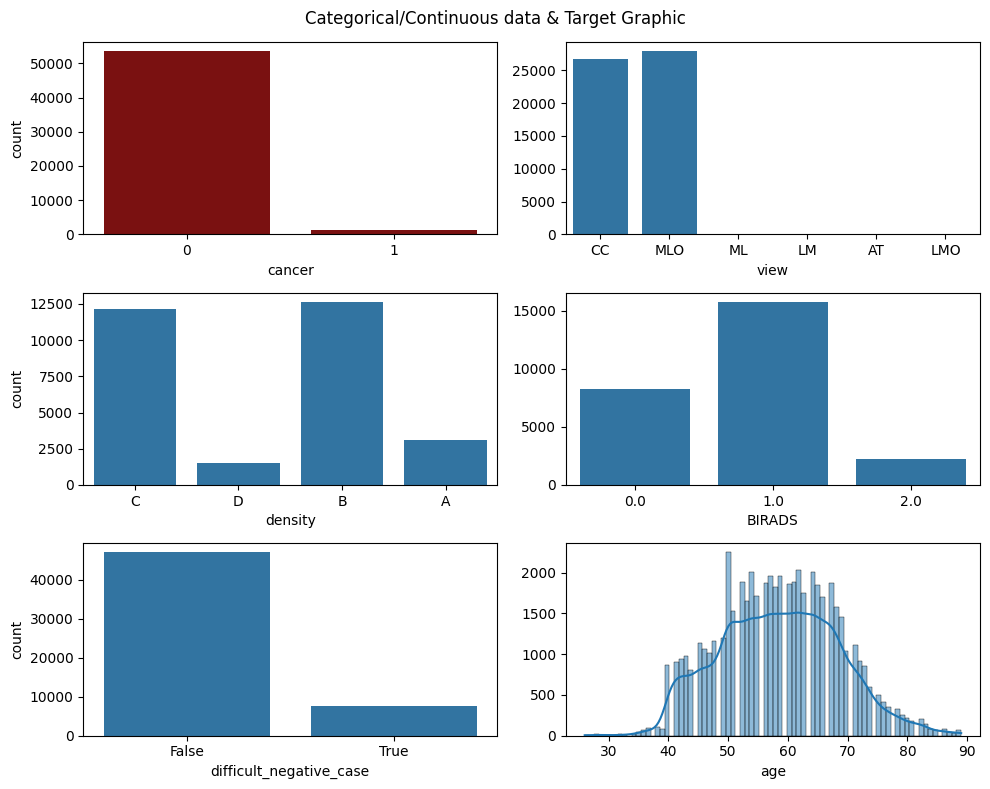

In [16]:
#Vamos a segmentar los graficos en varias figuras. El primero que tomaremos serán los identificadores y el Target.

fig, axis = plt.subplots(3,2, figsize=(10,8))

sns.countplot(dataTrain, x=dataTrain["cancer"], ax= axis[0,0], color="darkred")
sns.countplot(dataTrain, x=dataTrain["site_id"], ax=axis[0,1])
axis[0,1].set_ylabel(None)
sns.histplot(dataTrain, x=dataTrain["patient_id"], ax=axis[1,0])
sns.histplot(dataTrain, x=dataTrain["image_id"], ax=axis[1,1])
axis[1,1].set_ylabel(None)
sns.countplot(dataTrain, x=dataTrain["machine_id"], ax=axis[2,0])
axis[2,1].axis("off")

plt.suptitle("Id's & Target Graphic")

plt.tight_layout()
plt.show()

#El siguiente grafico será con los campos binarios

fig, axis = plt.subplots(3,2, figsize=(10,8))

sns.countplot(dataTrain, x=dataTrain["cancer"], ax= axis[0,0], color="darkred")
sns.countplot(dataTrain, x=dataTrain["biopsy"], ax=axis[0,1], color="darkgreen")
axis[0,1].set_ylabel(None)
sns.countplot(dataTrain, x=dataTrain["invasive"], ax=axis[1,0], color="darkorange")
sns.countplot(dataTrain, x=dataTrain["implant"], ax=axis[1,1])
axis[1,1].set_ylabel(None)
sns.countplot(dataTrain, x=dataTrain["laterality"], ax=axis[2,0])
axis[2,1].axis("off")

plt.suptitle("Binari data & Target Graphic")

plt.tight_layout()
plt.show()

#Por ultimo generamos el grafico de los campos categoricos y de la edad, que es continuo.

fig, axis = plt.subplots(3,2, figsize=(10,8))

sns.countplot(dataTrain, x=dataTrain["cancer"], ax= axis[0,0], color="darkred")
sns.countplot(dataTrain, x=dataTrain["view"], ax=axis[0,1])
axis[0,1].set_ylabel(None)
sns.countplot(dataTrain, x=dataTrain["density"], ax=axis[1,0])
sns.countplot(dataTrain, x=dataTrain["BIRADS"], ax=axis[1,1])
axis[1,1].set_ylabel(None)
sns.countplot(dataTrain, x=dataTrain["difficult_negative_case"], ax=axis[2,0])
sns.histplot(dataTrain, x=dataTrain["age"], ax=axis[2,1], kde=True)
axis[2,1].set_ylabel(None)

plt.suptitle("Categorical/Continuous data & Target Graphic")

plt.tight_layout()
plt.show()

- **Campos ID's**

    - `site_id`-> Vemos que este campo no es realmente relevante por lo que debemos de eliminarlo.

    - `patient_id` -> El identificador del paciente será necesario a la hora de procesar las imagenes.

    - `image_id` -> El identificador de la mamografias será necesario a la hora de procesar las imagenes.

    - `machine_id`-> Vemos que este campo no es realmente necesario por lo que debemos eliminarlo.

- **Campos binarios**
    
    - `biopsy` -> Vemos que el numero de biopsias realizadas aunque superior es muy similar al total de los casos positivos de cancer, por lo que a primera vista parece que la mayoria de personas que han tenido cancer se han hecho una biopsia. Lógico.

    - `invasive`-> Vemos que el numero de cancer invasivo es muy similar a los casos positivos del cancer, es natural pues todas las personas con un cancer invasivo en efecto tienen cancer.

    - `implant`-> Vemos que el numero de pacientes con implante es similar a los casos positivos. Aún así no tiene porque haber una relación directa entre los dos datos.

    - `laterality` -> Vemos que hay un pequeño descuadre en los datos, aunque en principio no debería de alterar el modelo.

- **Campos Categoricos**

    - `view`-> Vemos que hay una gran cantidad de planos CC y MLO pero pocas imagenes de los demás planos. Para este conjunto de datos habría que considerar eliminar los planos residuales.

    - `density`-> Vemos que hay una mayor cantidad de pacientes con la densidad mamaria B y C. Hay una cantidad importante de NaNs con lo que habrá que trabajar.

    - `BIRADS` -> Vemos que hay 3 categorias en BI-RADS, además de una gran cantidad de NaNs. Esto es sumamente inexacto con el mundo real a pesar de ser BI-RADS una herramienta muy útil para detectar el cancer de mama.

    - `difficult_negative_case`-> Vemos que hay una pequeña cantidad de pruebas que son dificiles de clasificar, de momento lo mantendremos en el dataframe y si más adelante vemos que no es relevante lo eliminaremos.

- **Campos Continuos**

    - `age` -> En la edad hay una pequeña cantidad de valores nulos que se podría predecir fácilmente con un modelo de imputación.

**Graficos Multivariables**

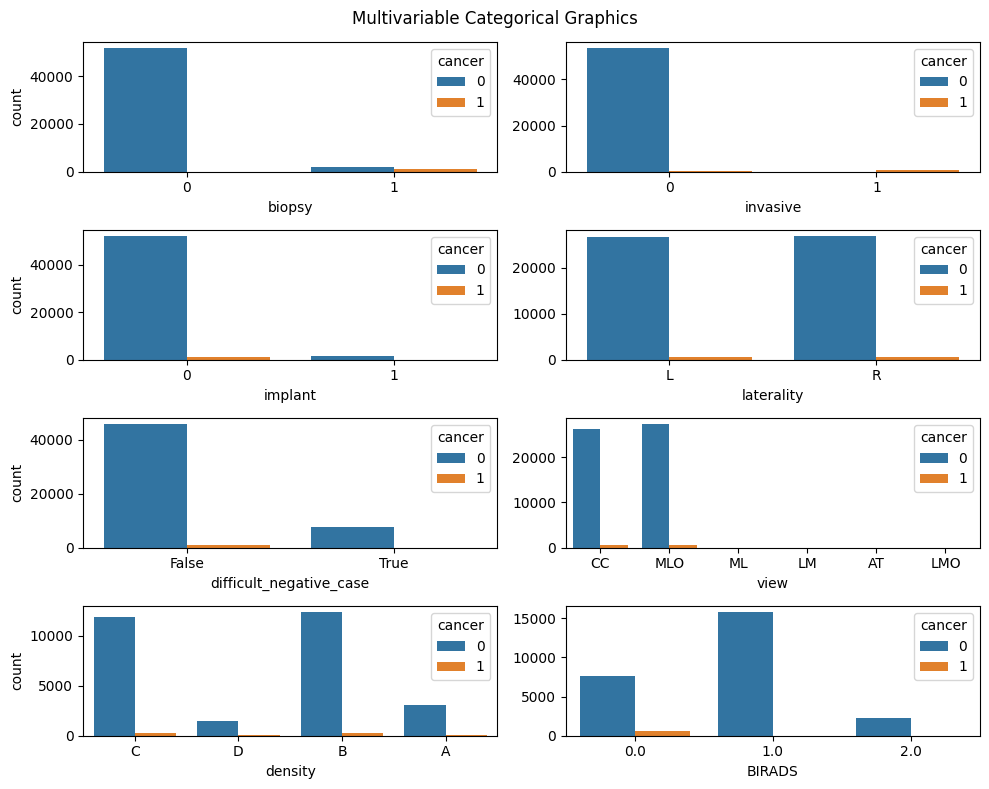

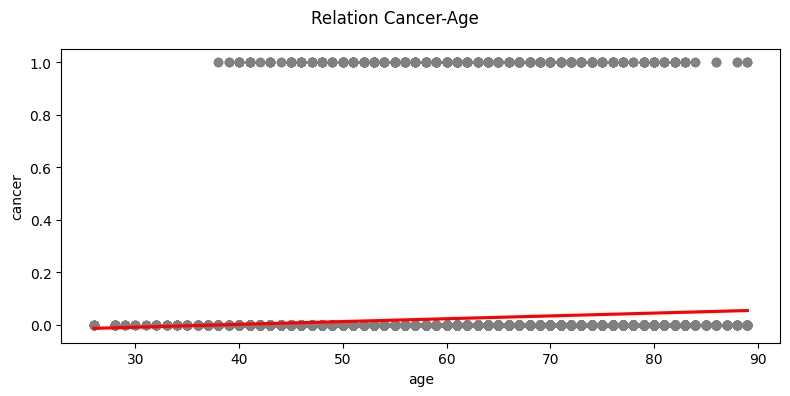

In [17]:
#Primero vamos a enfrentar la target con los campos binarios.

fig, axis = plt.subplots(4,2, figsize=(10,8))

sns.countplot(dataTrain, x="biopsy", hue="cancer", ax= axis[0,0])
sns.countplot(dataTrain, x="invasive", hue="cancer", ax= axis[0,1])
axis[0,1].set_ylabel(None)
sns.countplot(dataTrain, x="implant", hue="cancer", ax= axis[1,0])
sns.countplot(dataTrain, x="laterality", hue="cancer", ax= axis[1,1])
axis[1,1].set_ylabel(None)
sns.countplot(dataTrain, x="difficult_negative_case", hue="cancer", ax=axis[2,0])
sns.countplot(dataTrain, x="view", hue="cancer", ax=axis[2,1])
axis[2,1].set_ylabel(None)
sns.countplot(dataTrain, x="density", hue="cancer", ax=axis[3,0])
sns.countplot(dataTrain, x="BIRADS", hue="cancer", ax=axis[3,1])
axis[3,1].set_ylabel(None)

plt.suptitle("Multivariable Categorical Graphics")
plt.tight_layout()
plt.show()

#Ahora enfrentaremos la target con la edad.

fig, axis = plt.subplots(figsize=(8,4))

sns.regplot(dataTrain, x="age", y="cancer", line_kws=dict(color="red"), scatter_kws=dict(color="grey"))

plt.suptitle("Relation Cancer-Age")
plt.tight_layout()
plt.show()

- **Graficos Multivariables**

    - `biopsy-cancer` -> Confirmamos que todos los casos de pacientes con cáncer han recibido una biopsia.

    - `invasive-cancer` -> Vemos que la mayoria de casos de cáncer detectados han sido canceres invasivos.

    - `implant-cancer` -> Confirmamos que no hay relación alguna entre implante y que la paciente tenga cancer.

    - `laterality-cancer` -> Vemos que no hay una tendencia en el seno donde se desarrolla el cancer.

    - `difficult_negative_case-cancer` -> Vemos que no hay relación entre lo dificil que sea el caso en ser interpretado con que la paciente tenga cancer.

    - `view-cancer` -> Como era de esperar la proyección de la mamografia no afecta en que la paciente tenga o no cancer.

    - `density-cancer` -> Vemos que en proporcion con su total C y D tienen más cantidad de pacientes con cancer.

    - `BIRADS-cancer` -> Confirmamos que el campo 0 es el que posee todo el flujo de pacientes con cancer, por lo que en la escala real de BI-RADS sería el 6.

    - `age-cancer` -> Confirmamos una relación directa entre edad y cancer, a más edad más posibilidad de que la paciente tenga cancer.




**Procesamiento y limpieza de datos**

Una vez hecho un analisis principal del dataset y sus relaciones vamos a proceder a eliminar datos innecesarios y a gestionar los NaNs.

In [18]:
#El primer paso será visualizar la columna view para ver cuantos datos hay que no sean de los dos planos principales.

def ViewAnalisis(dataset, col= "view"):
    #Antes de empezar a trabajar el Dataset vamos a imprimir sus dimensiones.
    print(f"Dataset dimensions: {dataset.shape}\n")

    #Vamos a visualizar cuantos valores tiene cada una de las proyecciones
    print (f"Image view:\n==========\n{dataset[col].value_counts().to_string(header=False)}\n==========\n")

    #Una vez hemos visto la cantidad que tiene cada proyección vamos a quedarnos solamente con MLO y CC.
    print("Deleting non relevant data...")
    try:
        dataset = dataset[dataset["view"].isin(["MLO","CC"])]
        print("...Data deleted\n")
        print (f"Image view:\n==========\n{dataset[col].value_counts().to_string(header=False)}\n==========\n")
    except Exception as e:
        print(f"...Error: {e}")
    
    print(f"Final dataset dimensions: {dataset.shape}")
    return dataset


dataTrain = ViewAnalisis(dataTrain)


Dataset dimensions: (54706, 14)

Image view:
MLO    27903
CC     26765
AT        19
LM        10
ML         8
LMO        1

Deleting non relevant data...
...Data deleted

Image view:
MLO    27903
CC     26765

Final dataset dimensions: (54668, 14)


Ahora ya tenemos todas las filas que utilizaremos en el modelo final, así que procederemos a eliminar las columnas que no vamos a utilizar.

In [19]:
deleter_cols = ["site_id","machine_id","difficult_negative_case"]

def DataEraser(dataset, cols):
    #Primero visualizamos las dimensiones.
    print(f"Dataset Dimensions: {dataset.shape}\n")

    print(f"Deleting columns: {', '.join(cols)}...")
    try:
        erased_data = dataset.drop(columns=cols)
        print(f"...columns deleted.\n")
    except Exception as e:
        print(f"...Error: {e}\n")
    
    print(f"Final data dimensions: {erased_data.shape}")
    return erased_data

erasedDataTrain = DataEraser(dataTrain, deleter_cols)

Dataset Dimensions: (54668, 14)

Deleting columns: site_id, machine_id, difficult_negative_case...
...columns deleted.

Final data dimensions: (54668, 11)


Una vez eliminadas las columnas que no aportan valor vamos a trabajar los NaNs. 

In [20]:
#Vamos a predecir los valores faltantes con el modelo de KNNImputer de sklearn.
# Para ello antes tenemos que convertir los datos no numericos en numerico.

encoding_cols = ["laterality", "view"]

def parsingData(dataset, cols):
    #Primero mostramos las dimensiones del dataframe
    print(f"Data dimensions: {dataset.shape}\n")

    #Y la información del dataframe hasta el momento.
    print(f"Data description:\n==========\n{dataset.describe(include="all")}\n==========\n")

    #Vamos a hacer un OneHotEncoding de las columnas no numericas, excepto de density, porque la trataremos individualmente.
    encoder = OneHotEncoder(drop="if_binary", handle_unknown="ignore", sparse_output=False)
    print(f"Encodign columns: {', '.join(cols)}\n")
    encoded_cols = encoder.fit_transform(dataset[cols])
    print("Encoding data...\n==========\n")
    
    try:
        encoded_data = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(cols), index=dataset.index)
        merge_data = pd.concat([dataset, encoded_data], axis=1)
        print("Erase duplicated columns...")
        merge_data = merge_data.drop(columns=cols)
        print("Rename new columns...\n")
        encoded_data = merge_data.rename(columns={"laterality_R" : "laterality", "view_MLO" : "view"})
    except Exception as e:
        print(f"Error: {e}\n")

    #Vamos a hacer un Encoded manual de density.
    #A = 0, B = 1, C = 2, D = 3
    print(f"Encoding column: density\n\nEncoding data...")
    parse_density = {"A" : 0, "B" : 1, "C" : 2, "D" : 4}

    try:
        encoded_data["density"] = encoded_data["density"].replace(parse_density)
        print("...Data encoded successfully\n")
    except Exception as e:
        print(f"Error: {e}\n")

    #Para acabar vamos a revisualizar los datos básicos del dataframe.
    print(f"Data dimensions: {encoded_data.shape}\n")
    print(f"Data description:\n==========\n{encoded_data.describe(include="all")}")

    return encoded_data

encodedDataTrain = parsingData(erasedDataTrain, encoding_cols)

Data dimensions: (54668, 11)

Data description:
          patient_id      image_id laterality   view           age  \
count   54668.000000  5.466800e+04      54668  54668  54631.000000   
unique           NaN           NaN          2      2           NaN   
top              NaN           NaN          R    MLO           NaN   
freq             NaN           NaN      27415  27903           NaN   
mean    32699.289712  1.079303e+09        NaN    NaN     58.541012   
std     18895.824893  6.183136e+08        NaN    NaN     10.047866   
min         5.000000  6.849100e+04        NaN    NaN     26.000000   
25%     16481.000000  5.457360e+08        NaN    NaN     51.000000   
50%     32428.000000  1.082569e+09        NaN    NaN     59.000000   
75%     49006.750000  1.613068e+09        NaN    NaN     66.000000   
max     65534.000000  2.147472e+09        NaN    NaN     89.000000   

              cancer        biopsy      invasive        BIRADS       implant  \
count   54668.000000  54668.000

/tmp/ipykernel_11891/3498131255.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  encoded_data["density"] = encoded_data["density"].replace(parse_density)


Una vez hecho el parseo de los datos ya estamos listos para predecir los NaN.

In [21]:
imputing_cols = ["density", "age"]

def KnnImputer(dataset, cols, n):
    
    imputer = KNNImputer(n_neighbors= n)
    #Visualizamos los NaN en el dataframe
    print(f"Search NaN values:\n==========\n")
      
    nan_filter = dataset.isna().sum()
    data_nan = nan_filter[nan_filter > 0]

    if data_nan.empty:
        print("· Non Nan Values\n")
    
    else:
        for col, n in data_nan.items():
            print(f"· Column {col}: {n} NaN values\n")

    #Imputamos los valores faltantes en las columnas seleccionadas.
    print(f"Imputing data from columns: {', '.join(cols)}...")
    try:
        dataset[cols] = imputer.fit_transform(dataset[cols])
        print(f"...Data imputed")

    except Exception as e:
        print(f"...Error: {e}")
    
    return dataset

imputedDataTrain = KnnImputer(encodedDataTrain, imputing_cols, 5)

Search NaN values:

· Column age: 37 NaN values

· Column BIRADS: 28408 NaN values

· Column density: 25231 NaN values

Imputing data from columns: density, age...
...Data imputed


Teniendo los valores NaN convertidos a datos reales, ahora podemos hacer el arreglo final a la columna BI-RADS

In [22]:
def FixingBIRADS(dataset):
    print("Fixing BIRADS column...")

    if (dataset["BIRADS"].isna().sum() > 0):
        dataset["BIRADS"] = dataset["BIRADS"].fillna(4)
        print("...BIRADS column fixed")
    
    else:
        print("...No valid fixing values")
    
    return dataset

fixedDataTrain = FixingBIRADS(imputedDataTrain)

Fixing BIRADS column...
...BIRADS column fixed


**Mapa de correlaciones**

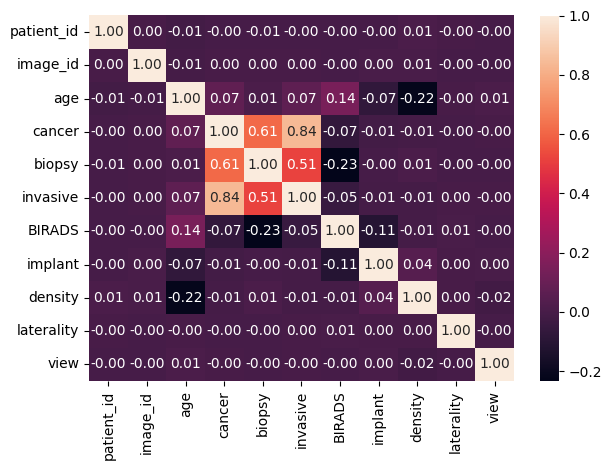

In [23]:
sns.heatmap(fixedDataTrain.corr(), annot=True, fmt=".2f")

plt.tight_layout()

## Conclusiones

- El target `cancer`, `biopsy` e `invasive` tienen una fuerte correlación entre ellas. Siendo la biopsia una prueba concluyente para detectar el cancer en la paciente y la invasibilidad del tumor una consecuencia del mismo.

- `BIRADS`presenta una correlación con `age`, `biopsy` e `implant`. Al ser la edad un factor de riesgo y los implantes un cuerpo extraño en el cuerpo de la paciente es normal que las personas con más edad y/o con implantes tengan un nivel más elevado en la escala BI-RADS. En el caso de la biopsia es natural que estén relacionadas ya que un BI-RADS alto va a desencadenar que a la paciente le hagan una biopsia para confirmar si tiene cancer.

- En cuanto a `density` vemos que tiene correlación con `age` al perderse el tejido grandular de la mama con los años.

- Los campos que no parecen tener relación alguna los utilizaremos más adelante a la hora de clasificar y cargar las mamografias por lo que todavía son necesarias en el Dataframe.

In [24]:
#Guardamos el dataset final.

fixedDataTrain.to_csv("../data/processed/clean_data.csv", index=False)